# Figure Mutation-SIINFEKL

In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import pearsonr, spearmanr

In [48]:
import utils_plot
import utils_config
import met_brewer

## Settings

In [49]:
TEXT_WIDTH = 6.7261  # in
DPI = 360

In [50]:
def set_font_size(font_size):
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size, title_fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)   # fontsize of the figure title

In [51]:
sb.set(context='paper', style='whitegrid')
plt.rc('grid', linewidth=0.3)
sb.set_palette('colorblind')
set_font_size(20)

## Settings

In [52]:
mapper_methods = {
    'imrex': 'ImRex', 
    'titan': 'TITAN', 
    'tcellmatch': 'TCellMatch',
    'stapler': 'STAPLER', 
    'ergo-ii': 'ERGO-II', 
    'pmtnet': 'pMTnet',
    'epitcr': 'epiTCR', 
    'atm-tcr': 'ATM-TCR', 
    'attntap': 'AttnTAP', 
    'teim': 'TEIM', 
    'bertrand': 'BERTrand', 
    'ergo-i': 'ERGO',
    'teinet': 'TEINet', 
    'panpep': 'PanPep', 
    'dlptcr': 'DLpTCR', 
    'tulip-tcr': 'TULIP-TCR', 
    'itcep': 'iTCep', 
    'nettcr': 'NetTCR-2.2',
}

## Load Data
### Performance

In [53]:
path_mutation = '../results/results_mutation_mouse_applicable_models_and_options.csv'
df_performance_all = pd.read_csv(path_mutation, index_col=0)
df_performance_all['Metric'] = df_performance_all['Metric'].replace('AverageRank', 'Rank')
df_performance_all['OldName'] = df_performance_all['Method']
df_performance_all['BaseModel'] = df_performance_all['Method'].str.split('_').str[0]
df_performance_all['Variant'] = df_performance_all['Method'].str.split('_').str[1:].str.join('_')
df_performance_all.head(5)

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
0,bertrand,SIINFEKL,full_data,3800,Classification,AUC,0.562786,bertrand,bertrand,
1,bertrand,SIINFEKL,full_data,3800,Classification,APS,0.470908,bertrand,bertrand,
2,bertrand,SIINFEKL,H5,152,Classification,AUC,0.258278,bertrand,bertrand,
3,bertrand,SIINFEKL,H5,152,Classification,APS,0.008850,bertrand,bertrand,
4,bertrand,SIINFEKL,Ed10,152,Classification,AUC,0.528431,bertrand,bertrand,


In [54]:
df_performance_all.to_csv('../supplement/S5_metrics_mutation_siinfekl_dataset.csv')

## Best models
We use the best models from the viral test

In [55]:
best_models = ['tulip-tcr',
 'nettcr_t.1.v.0',
 'teinet_SMALL_DS',
 'stapler',
 'ergo-ii_VDJDB',
 'titan',
 'ergo-i_AE_VDJDB',
 'atm-tcr',
 'imrex_FULL',
 'teim',
 'itcep',
 'bertrand',
 'dlptcr_BETA',
 'pmtnet',
 'tcellmatch_LINEAR_CV1',
 'epitcr_WO_MHC',
 'attntap_VDJDB',
 'panpep'
]

In [56]:
df_performance_best = df_performance_all[df_performance_all['OldName'].isin(best_models)].copy()
df_performance_best.head()

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
0,bertrand,SIINFEKL,full_data,3800,Classification,AUC,0.562786,bertrand,bertrand,
1,bertrand,SIINFEKL,full_data,3800,Classification,APS,0.470908,bertrand,bertrand,
2,bertrand,SIINFEKL,H5,152,Classification,AUC,0.258278,bertrand,bertrand,
3,bertrand,SIINFEKL,H5,152,Classification,APS,0.008850,bertrand,bertrand,
4,bertrand,SIINFEKL,Ed10,152,Classification,AUC,0.528431,bertrand,bertrand,


In [57]:
df_performance_best[(df_performance_best['Group']=='WeightedAverage') 
               &(df_performance_best['Metric']=='AUC')].sort_values('Value', ascending=False)

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
209,atm-tcr,All,WeightedAverage,25,Classification,AUC,0.584935,atm-tcr,atm-tcr,
209,ergo-ii_VDJDB,All,WeightedAverage,25,Classification,AUC,0.580836,ergo-ii_VDJDB,ergo-ii,VDJDB
209,tulip-tcr,All,WeightedAverage,25,Classification,AUC,0.559632,tulip-tcr,tulip-tcr,
209,epitcr_WO_MHC,All,WeightedAverage,25,Classification,AUC,0.530386,epitcr_WO_MHC,epitcr,WO_MHC
209,bertrand,All,WeightedAverage,25,Classification,AUC,0.513288,bertrand,bertrand,
209,ergo-i_AE_VDJDB,All,WeightedAverage,25,Classification,AUC,0.504911,ergo-i_AE_VDJDB,ergo-i,AE_VDJDB
209,titan,All,WeightedAverage,25,Classification,AUC,0.495826,titan,titan,
209,panpep,All,WeightedAverage,25,Classification,AUC,0.487712,panpep,panpep,
209,imrex_FULL,All,WeightedAverage,25,Classification,AUC,0.458668,imrex_FULL,imrex,FULL
209,teinet_SMALL_DS,All,WeightedAverage,25,Classification,AUC,0.457690,teinet_SMALL_DS,teinet,SMALL_DS


In [58]:
df_performance_best[(df_performance_best['Group']=='WeightedAverage') 
               &(df_performance_best['Metric']=='Spearman')].sort_values('Value', ascending=False)

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
223,tulip-tcr,All,WeightedAverage,25,Regression,Spearman,0.147459,tulip-tcr,tulip-tcr,
223,ergo-ii_VDJDB,All,WeightedAverage,25,Regression,Spearman,0.122828,ergo-ii_VDJDB,ergo-ii,VDJDB
223,atm-tcr,All,WeightedAverage,25,Regression,Spearman,0.097423,atm-tcr,atm-tcr,
223,ergo-i_AE_VDJDB,All,WeightedAverage,25,Regression,Spearman,0.077325,ergo-i_AE_VDJDB,ergo-i,AE_VDJDB
223,epitcr_WO_MHC,All,WeightedAverage,25,Regression,Spearman,0.061505,epitcr_WO_MHC,epitcr,WO_MHC
223,bertrand,All,WeightedAverage,25,Regression,Spearman,0.049851,bertrand,bertrand,
223,titan,All,WeightedAverage,25,Regression,Spearman,-0.035988,titan,titan,
223,panpep,All,WeightedAverage,25,Regression,Spearman,-0.045409,panpep,panpep,
223,teinet_SMALL_DS,All,WeightedAverage,25,Regression,Spearman,-0.071137,teinet_SMALL_DS,teinet,SMALL_DS
223,imrex_FULL,All,WeightedAverage,25,Regression,Spearman,-0.093562,imrex_FULL,imrex,FULL


### Prediction Scores

In [59]:
model_names_score = sorted(df_performance_best['Method'].unique())

prediction_scores = pd.read_csv(f'../tcr_benchmark/results/predictions_{model_names_score[0]}_mutation-mouse.csv', index_col=0)
prediction_scores = prediction_scores.drop(columns=['Score'])
for tag in model_names_score:
    df_tmp = pd.read_csv(f'../tcr_benchmark/results/predictions_{tag}_mutation-mouse.csv', index_col=0)
    prediction_scores[tag] = df_tmp['Score'].values
prediction_scores.head()

,Epitope,TCR,Activation Score,Label,MHC,CDR3_alpha,CDR3_beta,V_alpha,J_alpha,V_beta,...,ergo-i_AE_VDJDB,ergo-ii_VDJDB,imrex_FULL,itcep,panpep,tcellmatch_LINEAR_CV1,teim,teinet_SMALL_DS,titan,tulip-tcr
0,AIINFEKL,B11,26.910991,0,H2-Kb,CAAGSNYQLIW,CASSGGTGRNTLYF,TRAV14-1*01,TRAJ33*01,TRBV13-3*01,...,0.058679,0.016441,0.636963,0.0045,0.563152,0.999142,0.047197,0.053333,0.526631,-28.904604
1,CIINFEKL,B11,6.310569,0,H2-Kb,CAAGSNYQLIW,CASSGGTGRNTLYF,TRAV14-1*01,TRAJ33*01,TRBV13-3*01,...,0.214676,0.011190,0.699857,0.0045,0.388568,0.999929,0.054241,0.125180,0.575651,-29.687862
2,DIINFEKL,B11,22.092866,0,H2-Kb,CAAGSNYQLIW,CASSGGTGRNTLYF,TRAV14-1*01,TRAJ33*01,TRBV13-3*01,...,0.417740,0.013594,0.681702,0.0046,0.299029,0.994104,0.041232,0.514247,0.306817,-25.674015
3,EIINFEKL,B11,10.729142,0,H2-Kb,CAAGSNYQLIW,CASSGGTGRNTLYF,TRAV14-1*01,TRAJ33*01,TRBV13-3*01,...,0.001969,0.028155,0.697351,0.0044,0.583518,0.989244,0.046152,0.117215,0.291927,-33.599892
4,FIINFEKL,B11,0.963625,0,H2-Kb,CAAGSNYQLIW,CASSGGTGRNTLYF,TRAV14-1*01,TRAJ33*01,TRBV13-3*01,...,0.250977,0.027088,0.636259,0.0046,0.608651,0.999301,0.057093,0.121695,0.658792,-31.978146


In [60]:
prediction_scores.to_csv('../supplement/S6_prediction_scores_mutation_siinfekl_dataset.csv')

### Alternatives

In [61]:
mapper_alt_names = {
    'LSTM_CV0': 'LSTM 0', 
    'LSTM_CV1': 'LSTM 1', 
    'LSTM_CV2': 'LSTM 2', 
    'GRU_CV0': 'GRU 0', 
    'GRU_CV1': 'GRU 1',
    'GRU_CV2': 'GRU 2', 
    'GRU_SEP_CV0': 'GRU-sep 0', 
    'GRU_SEP_CV1': 'GRU-sep 1', 
    'GRU_SEP_CV2': 'GRU-sep 2',
    'LSTM_SEP_CV0': 'LSTM-sep 0', 
    'LSTM_SEP_CV1': 'LSTM-sep 1', 
    'LSTM_SEP_CV2': 'LSTM-sep 2', 
    'LINEAR_CV0': 'Linear 0',
    'LINEAR_CV1': 'Linear 1', 
    'LINEAR_CV2': 'Linear 2', 
    'AE_VDJDB': 'AE VDJdb', 
    'LSTM_VDJDB': 'LSTM VDJdb', 
    'AE_MCPAS': 'AE McPas',
    'LSTM_MCPAS': 'LSTM McPas', 
    'VDJDB': 'VDJdb', 
    'MCPAS': 'McPas', 
    'DOWNSAMPLED': 'Small DS', 
    'FULL': 'Large DS', 
    'LARGE_DS': 'Large DS',
    'SMALL_DS': 'Small DS', 
    'WITH_MHC': 'with MHC', 
    'WO_MHC': 'wo MHC', 
    'ALPHA_BETA': 'Both chains', 
    'ALPHA': 'Alpha', 
    'BETA': 'Beta',
    't.0.v.1': 'T0.V1', 
    't.0.v.2': 'T0.V2', 
    't.0.v.3': 'T0.V3',
    't.0.v.4': 'T0.V4', 
    't.1.v.0': 'T1.V1', 
    't.1.v.2': 'T1.V2',
    't.1.v.3': 'T1.V3', 
    't.1.v.4': 'T1.V4', 
    't.2.v.0': 'T2.V1',
    't.2.v.1': 'T2.V2', 
    't.2.v.3': 'T2.V3', 
    't.2.v.4': 'T2.V4',
    't.3.v.0': 'T3.V0', 
    't.3.v.1': 'T3.V1', 
    't.3.v.2': 'T3.V2',
    't.3.v.4': 'T3.V4', 
    't.4.v.0': 'T4.V0', 
    't.4.v.1': 'T4.V1',
    't.4.v.2': 'T4.V2', 
    't.4.v.3': 'T4.V3'
}

In [62]:
df_performance_alt = df_performance_all[df_performance_all['Variant']!=''].copy()
df_performance_alt['Metric'] = df_performance_alt['Metric'].replace('AverageRank', 'Rank')
df_performance_alt['Variant'] = df_performance_alt['Variant'].map(mapper_alt_names)
df_performance_alt['Method'] = df_performance_alt['BaseModel'] + ' ' + df_performance_alt['Variant']
df_performance_alt.head(5)

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
0,tcellmatch LSTM 0,SIINFEKL,full_data,3800,Classification,AUC,0.636091,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0
1,tcellmatch LSTM 0,SIINFEKL,full_data,3800,Classification,APS,0.541239,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0
2,tcellmatch LSTM 0,SIINFEKL,H5,152,Classification,AUC,0.509934,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0
3,tcellmatch LSTM 0,SIINFEKL,H5,152,Classification,APS,0.013333,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0
4,tcellmatch LSTM 0,SIINFEKL,Ed10,152,Classification,AUC,0.455490,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0


### Repertoires

In [63]:
def read_repertoire_data(repertoire):
    path_in = f'../data/Affinity_prediction_{repertoire}_repertoire.xlsx'
    sheet = 'Normalized data'
    df = pd.read_excel(path_in, sheet, engine='openpyxl', skiprows=1)

    df_epi = pd.read_excel(path_in, 'Individual APL screening', engine='openpyxl', skiprows=1)
    df['Mutated_position'] = df_epi['Position'].values
    df['Mutated AA'] = df_epi['Amino Acid'].values
    df.index = df['Mutated_position'].astype(str) + '_' + df['Mutated AA'].astype(str)
    df = df.drop(columns=['Mutated_position', 'Mutated AA', 'APL'])
    tcrs = (df>46.9).sum(axis=0) > 0
    tcrs = tcrs[tcrs].index
    df = df[tcrs.tolist()]
    return df
data_educated = read_repertoire_data('educated')
data_naive = read_repertoire_data('naive')
data_full = pd.concat([data_educated, data_naive], axis=1)
data_full.head()

,Ed5,Ed8,Ed9,Ed10,Ed16-1,Ed16-30,Ed21,Ed23,Ed28,Ed31,...,B11,B15,B3,F4,E8,B13,G6,F5,H5,OTI
1_A,25.659542,101.391637,84.735907,78.110830,37.962250,48.661922,86.425899,93.415404,74.227278,53.666660,...,26.910991,64.234367,10.368266,1.111752,32.619332,26.326591,10.949465,4.555243,2.875408,15.425218
1_C,12.799865,81.356164,10.684505,60.697189,4.354701,14.320574,50.989813,53.433611,41.646603,29.410154,...,6.310569,43.769582,8.465832,1.038850,1.057994,1.957516,8.454650,2.588951,1.916939,8.974325
1_D,50.122836,88.844168,9.090369,75.041519,2.304598,25.965667,76.888236,54.367765,37.869133,33.670504,...,22.092866,68.076735,10.748753,0.772759,67.942051,3.555488,6.652839,2.523408,1.700510,48.749267
1_E,78.234689,101.594015,1.518225,71.032623,5.895813,4.126572,78.575669,93.602235,56.378734,37.518561,...,10.729142,57.551988,10.130461,1.184654,9.151719,3.555488,4.019424,2.883895,1.700510,5.924880
1_F,5.508727,98.659526,17.829649,58.066351,0.102505,1.926031,68.010873,15.282760,68.183327,30.715745,...,0.963625,10.934042,8.418271,1.421585,2.209021,0.731072,7.553745,2.294007,3.864796,6.893491


In [64]:
vmin = data_full.values.min()
vmax = data_full.values.max()

## Poster

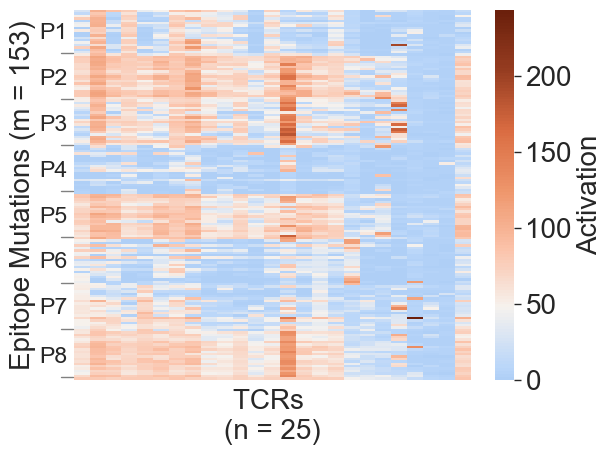

In [65]:
def plot_data_heatmap(data, tag='', ax=None, do_legend=True):
    plot = sb.heatmap(data=data, ax=ax, center=46.9, vmin=vmin, vmax=vmax, 
                      yticklabels=data.index, square=False, 
                     cmap=list(reversed(met_brewer.met_brew(name='OKeeffe1', n=200, brew_type='continuous'))))
    plot.set_xticklabels([])    
    apl_colors = np.array([int(apl.split('_')[0]) for apl in data.index]).reshape((1, -1))
    apl_labels = [''] * len(data.index)
    idx_start = 0
    
    
    bbox = plot.get_position()
    width = bbox.width / (0.25 if tag=='CMV ' else 0.2)
    
    for i in list(set(apl_colors.tolist()[0])):
        n_elements = np.sum(apl_colors==i)
        if i not in [0, 9]:
            plot.axhline(y=idx_start + n_elements - 1, color='gray', linewidth=1, 
                         xmin=-0.1/width, xmax=-0.01/width, clip_on=False)
        apl_labels[idx_start + max(n_elements//2, 3)] = f'P{i}' if i != 0 else ''
        idx_start += n_elements
        
    plot.set_yticklabels(apl_labels, rotation=0, size='small')
    
    plot.set_ylabel(f'Epitope Mutations (m = {data.shape[0]})', labelpad=2)
    #plot.xaxis.set_label_position('top')
    plot.set_xlabel(f'{tag}TCRs \n(n = {data.shape[1]})', labelpad=2)
    
    plot.collections[0].colorbar.set_label('Activation', rotation=90)
    
    plot.tick_params(axis='both', pad=0)
    if not do_legend:
        plot.collections[0].colorbar.remove()

plot_data_heatmap(data_full)

In [66]:
data_full

,Ed5,Ed8,Ed9,Ed10,Ed16-1,Ed16-30,Ed21,Ed23,Ed28,Ed31,...,B11,B15,B3,F4,E8,B13,G6,F5,H5,OTI
1_A,25.659542,101.391637,84.735907,78.110830,37.962250,48.661922,86.425899,93.415404,74.227278,53.666660,...,26.910991,64.234367,10.368266,1.111752,32.619332,26.326591,10.949465,4.555243,2.875408,15.425218
1_C,12.799865,81.356164,10.684505,60.697189,4.354701,14.320574,50.989813,53.433611,41.646603,29.410154,...,6.310569,43.769582,8.465832,1.038850,1.057994,1.957516,8.454650,2.588951,1.916939,8.974325
1_D,50.122836,88.844168,9.090369,75.041519,2.304598,25.965667,76.888236,54.367765,37.869133,33.670504,...,22.092866,68.076735,10.748753,0.772759,67.942051,3.555488,6.652839,2.523408,1.700510,48.749267
1_E,78.234689,101.594015,1.518225,71.032623,5.895813,4.126572,78.575669,93.602235,56.378734,37.518561,...,10.729142,57.551988,10.130461,1.184654,9.151719,3.555488,4.019424,2.883895,1.700510,5.924880
1_F,5.508727,98.659526,17.829649,58.066351,0.102505,1.926031,68.010873,15.282760,68.183327,30.715745,...,0.963625,10.934042,8.418271,1.421585,2.209021,0.731072,7.553745,2.294007,3.864796,6.893491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_T,53.532146,87.225140,79.327232,64.768724,76.490045,84.403594,66.103340,75.479646,58.740591,57.652148,...,59.580228,74.090876,32.816988,25.059989,16.155228,10.426768,5.959835,3.965356,4.359490,79.432149
8_V,43.543466,69.415830,69.648551,57.690517,65.603292,77.435545,57.959644,63.335644,53.725264,54.285098,...,56.994893,68.327324,37.192586,18.644632,17.212467,12.384284,9.424856,4.555243,3.215510,77.745131
8_W,46.653713,75.183619,72.969667,56.124542,65.461905,71.603141,61.994809,69.127399,48.380202,51.192909,...,51.471677,61.060237,21.687748,20.047991,12.512306,13.343067,32.293992,2.556180,1.545918,71.600834
8_Y,67.647885,91.981035,89.575248,76.482216,79.388466,86.849475,82.390734,91.920758,63.717942,61.637636,...,64.985930,60.141410,29.012120,36.651373,44.755586,25.607503,35.273909,6.488764,4.575918,79.062720


['bertrand' 'epitcr' 'tulip-tcr' 'ergo-ii' 'atm-tcr']
PearsonRResult(statistic=-0.09206293923437059, pvalue=0.6616183759909866)


,Value,WT_activation,%_Activated,Dataset
B11,0.538153,77.090,0.457516,SIINFEKL
B13,0.529016,31.520,0.196078,SIINFEKL
B15,0.520087,75.845,0.477124,SIINFEKL
B3,0.532693,46.895,0.150327,SIINFEKL
E8,0.493424,36.355,0.156863,SIINFEKL
Ed10,0.546804,79.990,0.673203,SIINFEKL
Ed16-1,0.602051,79.035,0.575163,SIINFEKL
Ed16-30,0.554788,77.110,0.509804,SIINFEKL
Ed21,0.587950,84.445,0.797386,SIINFEKL
Ed23,0.510283,73.985,0.679739,SIINFEKL


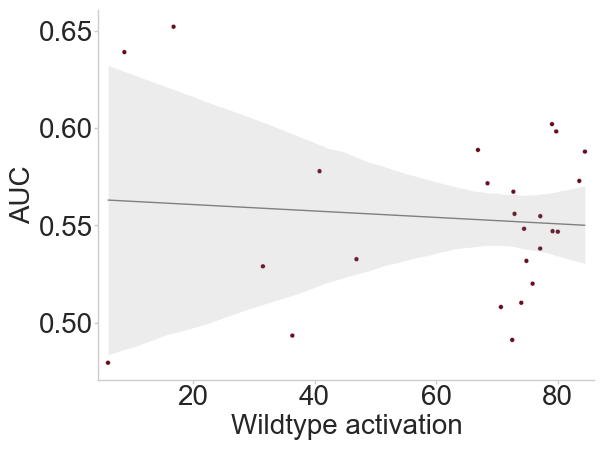

In [67]:
color_dataset = met_brewer.met_brew(name='Navajo', n=1, brew_type='disrete')
def plot_wt_vs_performance(df, metric, n_top=5, ax=None):
    df_tmp = df[df['Metric']==metric]
    if n_top:
        best_models = df_tmp[df_tmp['Group']=='Average'].sort_values('Value')['BaseModel'][-n_top:].values
        print(best_models)
        df_tmp = df_tmp[df_tmp['BaseModel'].isin(best_models)]
    
    df_tmp = df_tmp[~df_tmp['Group'].isin(['Average', 'WeightedAverage', 'full_data'])]
    df_tmp = df_tmp.groupby('Group')['Value'].mean()
    df_tmp = pd.DataFrame(df_tmp)
    df_tmp.index.name = None
    
    df_wt = pd.concat([pd.DataFrame(data_full.loc['8_Unmutated (N4)']), pd.DataFrame((data_full>46.9).mean())], axis=1)
    df_wt['Dataset'] = 'SIINFEKL'
    df_wt.columns = ['WT_activation', '%_Activated', 'Dataset', ]
    df_tmp = pd.concat([df_tmp, df_wt], axis=1)    
    
    plot = sb.scatterplot(data=df_tmp, x='WT_activation', y='Value',
                          hue='Dataset', palette=color_dataset,
                         size=1, color='seagreen', ax=ax)
    df_tmp = df_tmp.copy()
    plot = sb.regplot(data=df_tmp, x='WT_activation', y='Value',
                      color='gray', ax=ax, scatter=False, line_kws={'zorder': -1, 
                                                                    'linewidth': utils_plot.LINEWIDTH})
    delta = df_tmp['WT_activation'].max() - df_tmp['WT_activation'].min()
    plot.set_xlim(df_tmp['WT_activation'].min()-0.02*delta, df_tmp['WT_activation'].max()+0.02*delta,)
    
    sb.despine(ax=plot)
    plot.grid(False)
    plot.set_ylabel(metric, labelpad=2)
    plot.set_xlabel('Wildtype activation', labelpad=2)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    plot.legend().remove()
    
    corr = pearsonr(df_tmp['WT_activation'].values, df_tmp['Value'].values)
    print(corr)
    #plot.set_title(f'r = {corr:.2f}     $p$-val = {p_val:.3f}', pad=1)
    return df_tmp
    
plot_wt_vs_performance(df_performance_best, 'AUC', 5)

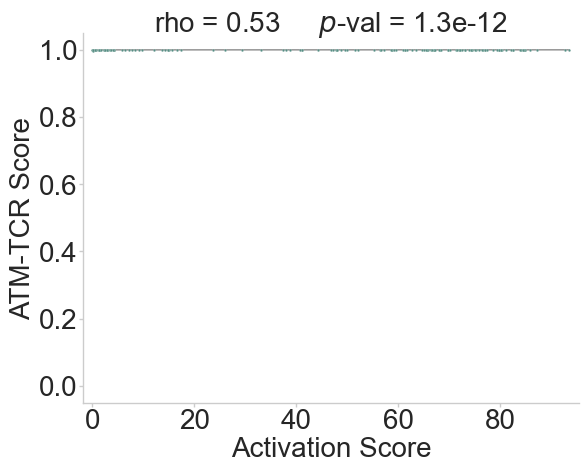

In [68]:
def plot_prediction_vs_activation(tcrs, method, ax=None):
    df_tmp = prediction_scores[prediction_scores['TCR'].isin(tcrs)][['Activation Score', 'Label', 'TCR', method]]
    plot = sb.scatterplot(data=df_tmp, x='Activation Score', y=method,
                          color=met_brewer.met_brew(name='Kandinsky', n=2, brew_type='disrete')[1 if tcrs[0].startswith('R') else 0],
                         s=3, ax=ax)
    df_tmp = df_tmp.copy()
    
    for tcr in tcrs:
        df_tcr = df_tmp[df_tmp['TCR']==tcr]
        plot = sb.regplot(data=df_tcr, x='Activation Score', y=method,
                          color='gray', ax=ax, scatter=False, line_kws={'zorder': -1, 
                                                                    'linewidth': utils_plot.LINEWIDTH})
        corr, p_val = spearmanr(df_tcr['Activation Score'].values, df_tcr[method].values)
        out = f'rho = {corr:.2f}     $p$-val = {p_val:.1e}'
        if len(tcrs) == 1:
            plot.set_title(out, pad=1)
        else:
            print(f'{tcr}: ' + out)
    
    sb.despine(ax=plot)
    plot.grid(False)
    plot.set_ylabel(f'{utils_config.mapper_methods[method]} Score', labelpad=2)
    plot.set_xlabel('Activation Score', labelpad=2)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    #plot.legend().remove()
    
    delta = df_tmp['Activation Score'].max() - df_tmp['Activation Score'].min()
    plot.set_xlim(df_tmp['Activation Score'].min()-0.02*delta, df_tmp['Activation Score'].max()+0.02*delta,)
    plot.set_ylim(-0.05, 1.05)
    
    #return df_tmp
    
plot_prediction_vs_activation(['Ed16-1'], 'atm-tcr') #'R25', 

In [69]:
df_performance_best[(df_performance_best['Method']=='atm-tcr')
                   & (df_performance_best['Metric']=='Spearman')
                   & (~df_performance_best['Group'].isin(['full_data', 'Average', 'WeightedAverage']))].sort_values('Value')

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
199,atm-tcr,SIINFEKL,Ed33,152,Regression,Spearman,-0.185553,atm-tcr,atm-tcr,
179,atm-tcr,SIINFEKL,E8,152,Regression,Spearman,-0.162381,atm-tcr,atm-tcr,
205,atm-tcr,SIINFEKL,B3,152,Regression,Spearman,-0.149797,atm-tcr,atm-tcr,
183,atm-tcr,SIINFEKL,B11,152,Regression,Spearman,-0.090649,atm-tcr,atm-tcr,
197,atm-tcr,SIINFEKL,F5,152,Regression,Spearman,-0.024249,atm-tcr,atm-tcr,
173,atm-tcr,SIINFEKL,B15,152,Regression,Spearman,-0.012046,atm-tcr,atm-tcr,
165,atm-tcr,SIINFEKL,Ed40,152,Regression,Spearman,0.010631,atm-tcr,atm-tcr,
167,atm-tcr,SIINFEKL,Ed46,152,Regression,Spearman,0.012396,atm-tcr,atm-tcr,
193,atm-tcr,SIINFEKL,Ed9,152,Regression,Spearman,0.032404,atm-tcr,atm-tcr,
175,atm-tcr,SIINFEKL,Ed23,152,Regression,Spearman,0.050795,atm-tcr,atm-tcr,


### Highlight organism in x label

In [70]:
mouse_models = ['ergo-ii', 'epitcr', 'ergo-i', 'tulip-tcr']
mouse_models = [utils_config.mapper_methods[el] for el in mouse_models]
color_mouse = 'firebrick'
color_human = 'black'

def color_organism(ax):
    xticklabels = ax.get_xticklabels()
    for label in xticklabels:
        if label.get_text() in mouse_models:
            label.set_color(color_mouse)
            #label.set_fontweight('bold') 
        else:
            label.set_color(color_human)

## Data Figure

D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Proje

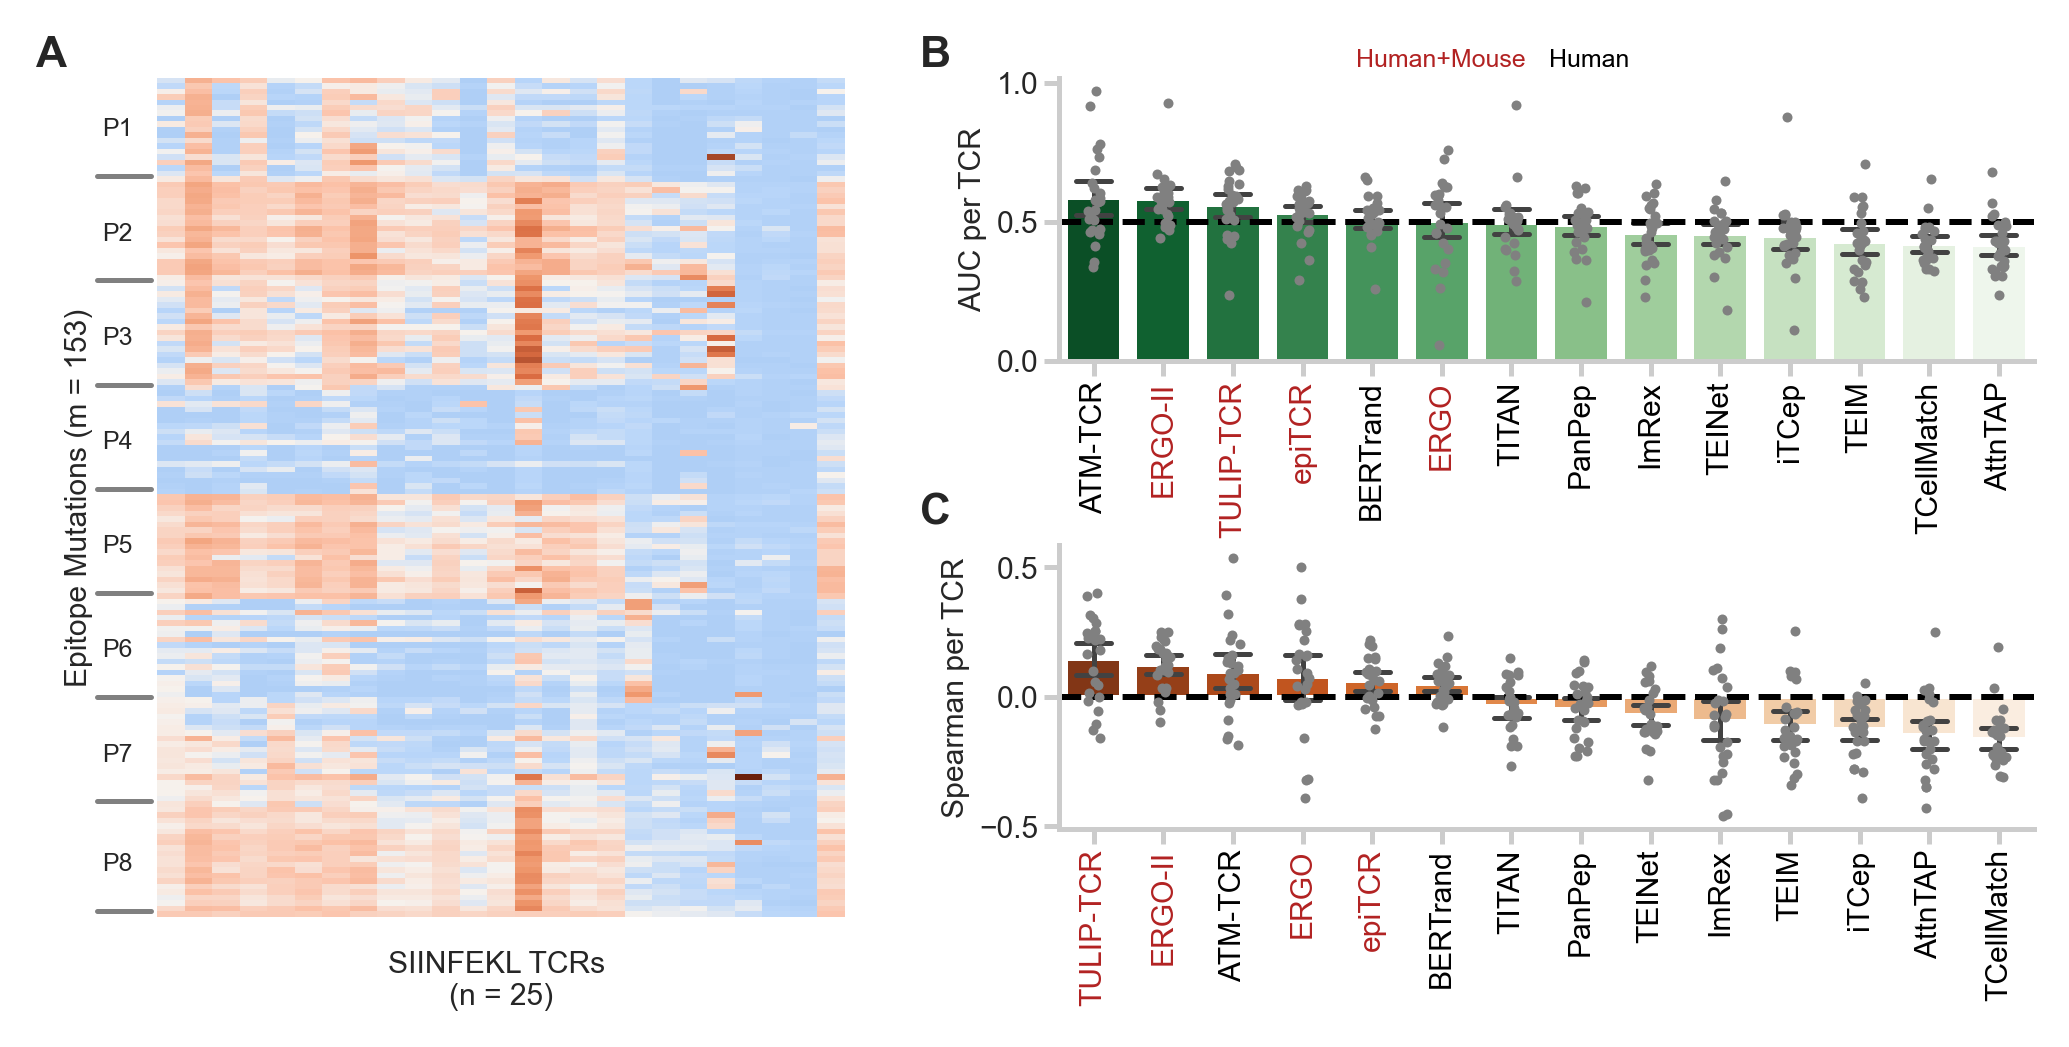

In [71]:
scale = 1
fig = plt.figure(figsize=(TEXT_WIDTH * scale, TEXT_WIDTH * scale * 0.45),
                 dpi=DPI)
set_font_size(6)
utils_plot.LINEWIDTH = 1

gridspecs = {}

gridspecs["full"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=1,
    ncols=2,
    width_ratios=[1.3, 2],
    wspace=0.15
)

gridspecs["full1"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=3,
    height_ratios=[0.66, 0.01],
    width_ratios=[0.3, 1, 2],
    wspace=0.25
)

gridspecs["cd"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs['full1'][2],
    nrows=2,
    ncols=1,
    height_ratios=[1, 1],
    width_ratios=[1],
    hspace=0.65,
    wspace=0.3,
)


ax_a = fig.add_subplot(gridspecs["full"][0])
ax_c = fig.add_subplot(gridspecs["cd"][0])
ax_d = fig.add_subplot(gridspecs["cd"][1])

plot_data_heatmap(data_full, 'SIINFEKL ', ax_a, do_legend=False)

utils_plot.plot_barplot(df_performance_best, 'AUC', n_top=14, cmap='Greens_r', ax=ax_c, rdm=0.5)
ax_c.set_ylabel('AUC per TCR')
color_organism(ax_c)

utils_plot.plot_barplot(df_performance_best, 'Spearman', n_top=14, cmap='Oranges_r', ax=ax_d, rdm=0.0)
ax_d.set_ylabel('Spearman per TCR')
color_organism(ax_d)

fig.text(0.7, 0.89, 'Human', color=color_human, size='small')
fig.text(0.62, 0.89, 'Human+Mouse', color=color_mouse, size='small')


fig.text(0.075, 0.89, 'A', size='x-large', weight='bold')
fig.text(0.44, 0.89, 'B', size='x-large', weight='bold')
fig.text(0.44, 0.47, 'C', size='x-large', weight='bold')

fig.tight_layout()
fig.savefig('../figures/sfig_mutation_siinfekl_benchmark.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/sfig_mutation_siinfekl_benchmark.png',
           dpi=DPI, bbox_inches='tight')

In [72]:
df_performance_best[~df_performance_best['Group'].isin(['full_data', 'Average', 'WeightedAverage'])]['Group'].nunique()

25

## Alternatives

In [73]:
base_methods_used = sorted(df_performance_alt['BaseModel'].unique(), key=lambda x: x.lower())
base_methods = ['attntap', 'dlptcr', 'epitcr', 'ergo-i', 'ergo-ii', 'imrex', 'nettcr', 'tcellmatch', 'teinet']
colors_models = {m: met_brewer.met_brew(name='Signac', n=9, brew_type='discrete')[i]  # sb.color_palette('pastel')[i] 
                 for i, m in enumerate(base_methods)}
colors_models

{'attntap': '#2b9b81',
 'dlptcr': '#fe9b00',
 'epitcr': '#f4c40f',
 'ergo-i': '#fbe183',
 'ergo-ii': '#633372',
 'imrex': '#9b3441',
 'nettcr': '#e6a2a6',
 'tcellmatch': '#92c051',
 'teinet': '#1f6e9c'}

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1037769809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1037769809.py:14: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1037769809.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)


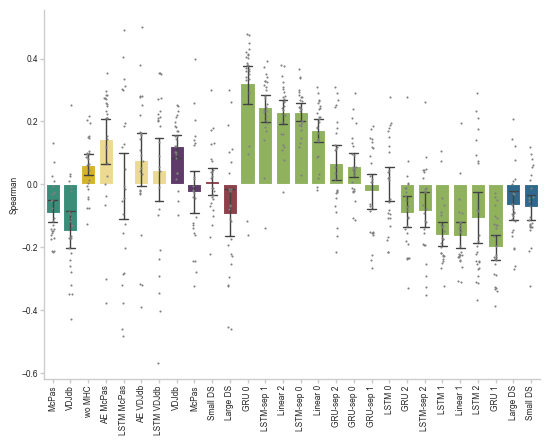

In [74]:
from matplotlib.patches import Patch
def plot_alternatives(df, metric, sort_by='Average', ax=None, rdm=None):
    df_plot = df[(df['Metric']==metric) & (~df['Group'].isin(['full_data', 'Average', 'WeightedAverage']))].copy()
    mean_perf = df_plot.groupby('Method')['Value'].mean().to_dict()
    df_plot['avgValue'] = df_plot['Method'].map(mean_perf)
    
    order = df[(df['Metric']=='AUC') & (df['Group']==sort_by)].sort_values(['BaseModel', 'Value'], ascending=[True, False],
                                                                           )['Method'].values
    
    order_base = df[(df['Metric']=='AUC') & (df['Group']==sort_by)].sort_values(['Method'])['BaseModel'].values
    palette = [colors_models[m] for m in order_base]
    df_plot = df_plot.reset_index(drop=True)
    
    plot = sb.barplot(data=df_plot, y='Value', x='Method',
                          order=order,
                          palette=palette,
                          errwidth=utils_plot.LINEWIDTH,
                          capsize=0.5,
                          ax=ax)
    plot = sb.stripplot(data=df_plot, y='Value', x='Method',
                          order=order,
                          color='gray',
                          size=1.5,
                          ax=ax)

    xlabels = plot.get_xticklabels()
    xlabels = [' '.join(el.get_text().split(' ')[1:]) for el in xlabels]
    plot.set_xticklabels(xlabels, rotation=90)

    sb.despine(ax=plot)
    plot.grid(False)
    plot.set_ylabel(metric, labelpad=2)
    plot.set_xlabel(None)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)

    plot.spines['left'].set_linewidth(utils_plot.LINEWIDTH)
    plot.spines['bottom'].set_linewidth(utils_plot.LINEWIDTH)

    if rdm is not None:
        plot.axhline(y=rdm, color='gray', linestyle='--')

plot_alternatives(df_performance_alt, 'Spearman')

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1037769809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1037769809.py:14: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1037769809.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1037769809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

Text(0.07, 0.48, 'B')

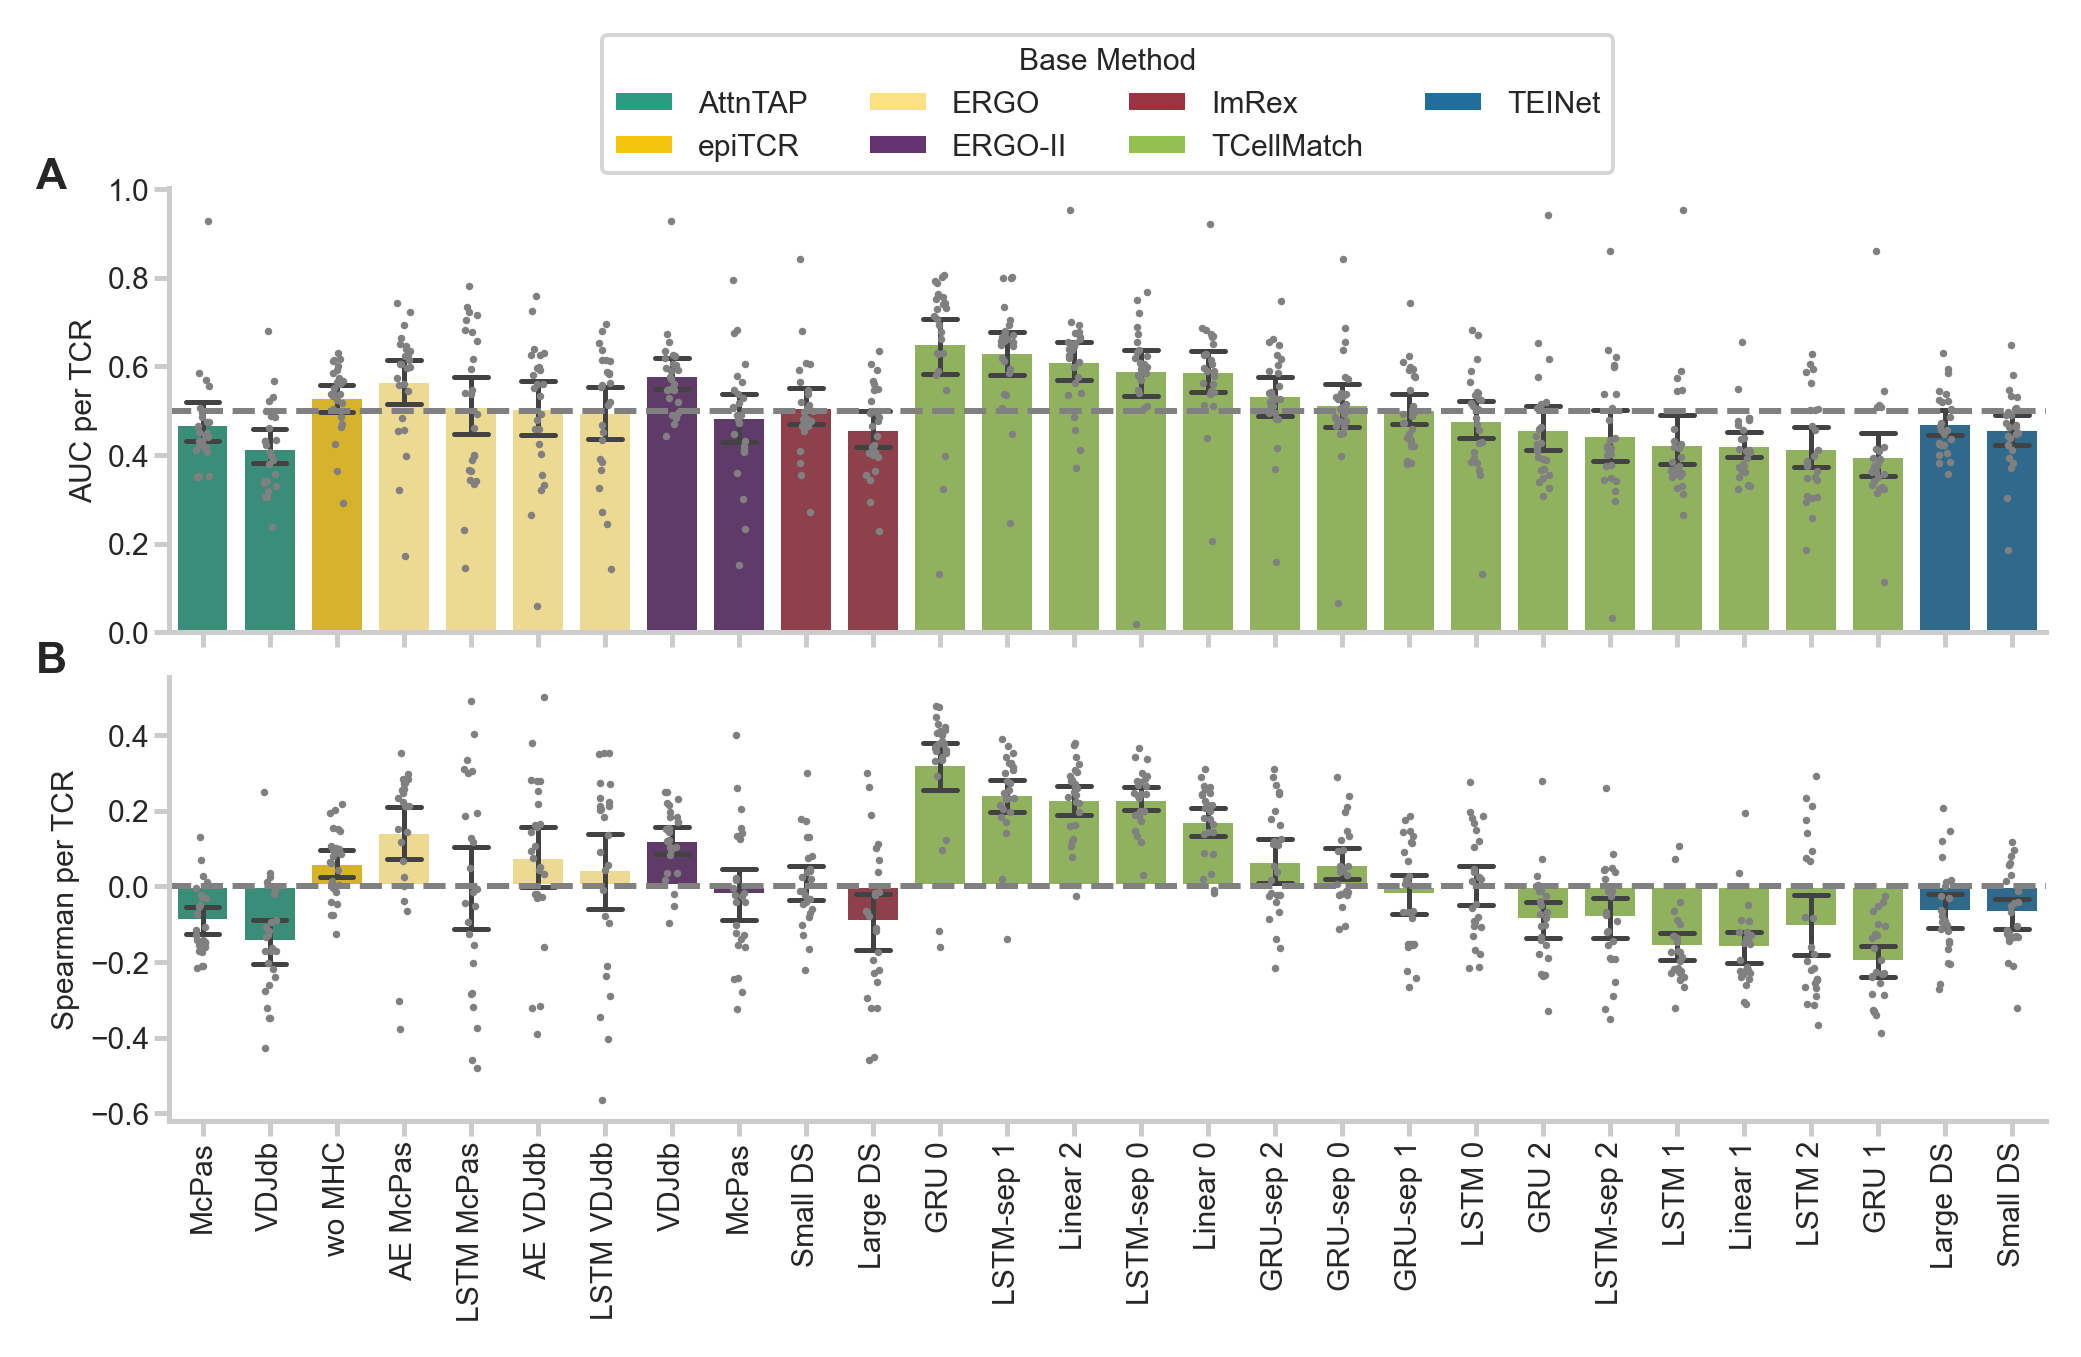

In [75]:
scale = 1
fig = plt.figure(figsize=(TEXT_WIDTH * scale, TEXT_WIDTH * scale * 0.5),
                 dpi=DPI)
set_font_size(6)
utils_plot.LINEWIDTH = 1

gridspecs = {}

gridspecs["full"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=1,
    height_ratios=[1, 1],
    width_ratios=[1],
    hspace=0.1
)

for i, metric in enumerate(['AUC', 'Spearman']):    
    ax_ = fig.add_subplot(gridspecs["full"][i])
    plot_alternatives(df_performance_alt, metric, sort_by='Average', ax=ax_, rdm=0.5 if i==0 else 0)
    ax_.set_ylabel(f'{metric} per TCR')
    
    if i == 0:
        ax_.set_xticklabels([])
        custom_legend = [Patch(facecolor=c, label=utils_config.mapper_methods[l]) for l, c in colors_models.items() 
                        if l in base_methods_used]
        ax_.legend(handles=custom_legend, title='Base Method', ncol=4, bbox_to_anchor=(0.5, 1), loc='lower center')

fig.text(0.07, 0.88, 'A', size='x-large', weight='bold')
fig.text(0.07, 0.48, 'B', size='x-large', weight='bold')

#fig.tight_layout()
#fig.savefig('../figures/sfig_mutation_siinfekl_alternatives.pdf',
#           dpi=DPI, bbox_inches='tight')
#fig.savefig('../figures/sfig_mutation_siinfekl_alternatives.png',
#           dpi=DPI, bbox_inches='tight')

## Average over TCR

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1922328287.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


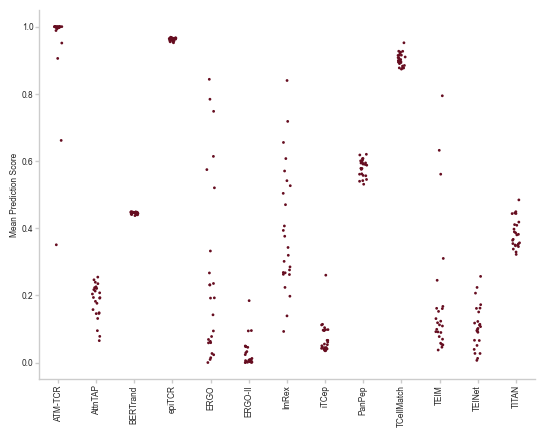

In [76]:
def plot_stats_prediction(stat, exclude=None, ax=None):
    df_tmp = prediction_scores[['TCR'] + prediction_scores.columns.tolist()[-14:]]
    df_tmp = pd.melt(df_tmp, id_vars=['TCR'], var_name='Method', value_name='Value')
    
    if stat.lower() == 'std':
        df_tmp = df_tmp.groupby(['Method', 'TCR']).std()
    else:
        df_tmp = df_tmp.groupby(['Method', 'TCR']).mean()
    df_tmp = df_tmp.reset_index()
    df_tmp['Dataset'] = df_tmp['TCR'].apply(lambda x: 'Tumor' if x.startswith('R') else 'CMV')
    
    if exclude is not None:
        df_tmp = df_tmp[~df_tmp['Method'].isin(exclude)]
    df_tmp['Method'] = df_tmp['Method'].str.split('_').str[0]
    df_tmp['Method'] = df_tmp['Method'].map(utils_config.mapper_methods)
    
    
    plot = sb.stripplot(data=df_tmp, x='Method', y='Value',
                          hue='Dataset', palette=color_dataset,
                         size=2, ax=ax)
    
    sb.despine(ax=plot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.grid(False)
    plot.set_ylabel(f'{stat} Prediction Score', labelpad=2)
    plot.set_xlabel(None)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    plot.legend().remove()

plot_stats_prediction('Mean', ['tulip-tcr'])

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\2660675886.py:11: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  plot = sb.stripplot(data=df_tmp, x='Method', y='Label',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\2660675886.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


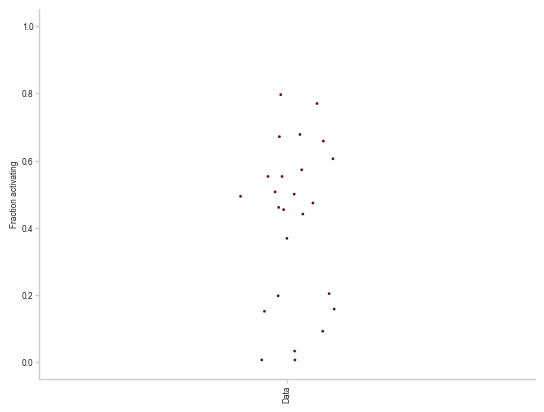

In [77]:
def plot_stats_data(stat, ax=None):
    df_tmp = prediction_scores[['TCR', 'Label']]
    df_tmp = df_tmp.groupby('TCR')['Label']
    if stat.lower() == 'std':
        df_tmp = df_tmp.std()
    else:
        df_tmp = df_tmp.mean()
    df_tmp = df_tmp.reset_index()
    df_tmp['Method'] = 'Data'

    plot = sb.stripplot(data=df_tmp, x='Method', y='Label',
                          hue='TCR', palette=color_dataset,
                         size=2, ax=ax)
    
    sb.despine(ax=plot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.grid(False)
    if stat.lower() == 'mean':
        plot.set_ylabel(f'Fraction activating', labelpad=2)
    else:
        plot.set_ylabel(f'Std', labelpad=2)
    plot.set_xlabel(None)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    plot.legend().remove()
    plot.set_ylim(-0.05, 1.05)

plot_stats_data('Mean')

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\2660675886.py:11: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  plot = sb.stripplot(data=df_tmp, x='Method', y='Label',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\2660675886.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1922328287.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1922328287.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\2660675886.py:11: UserWarning: 
The palette list has fewe

Text(0.0, 0.6, 'B')

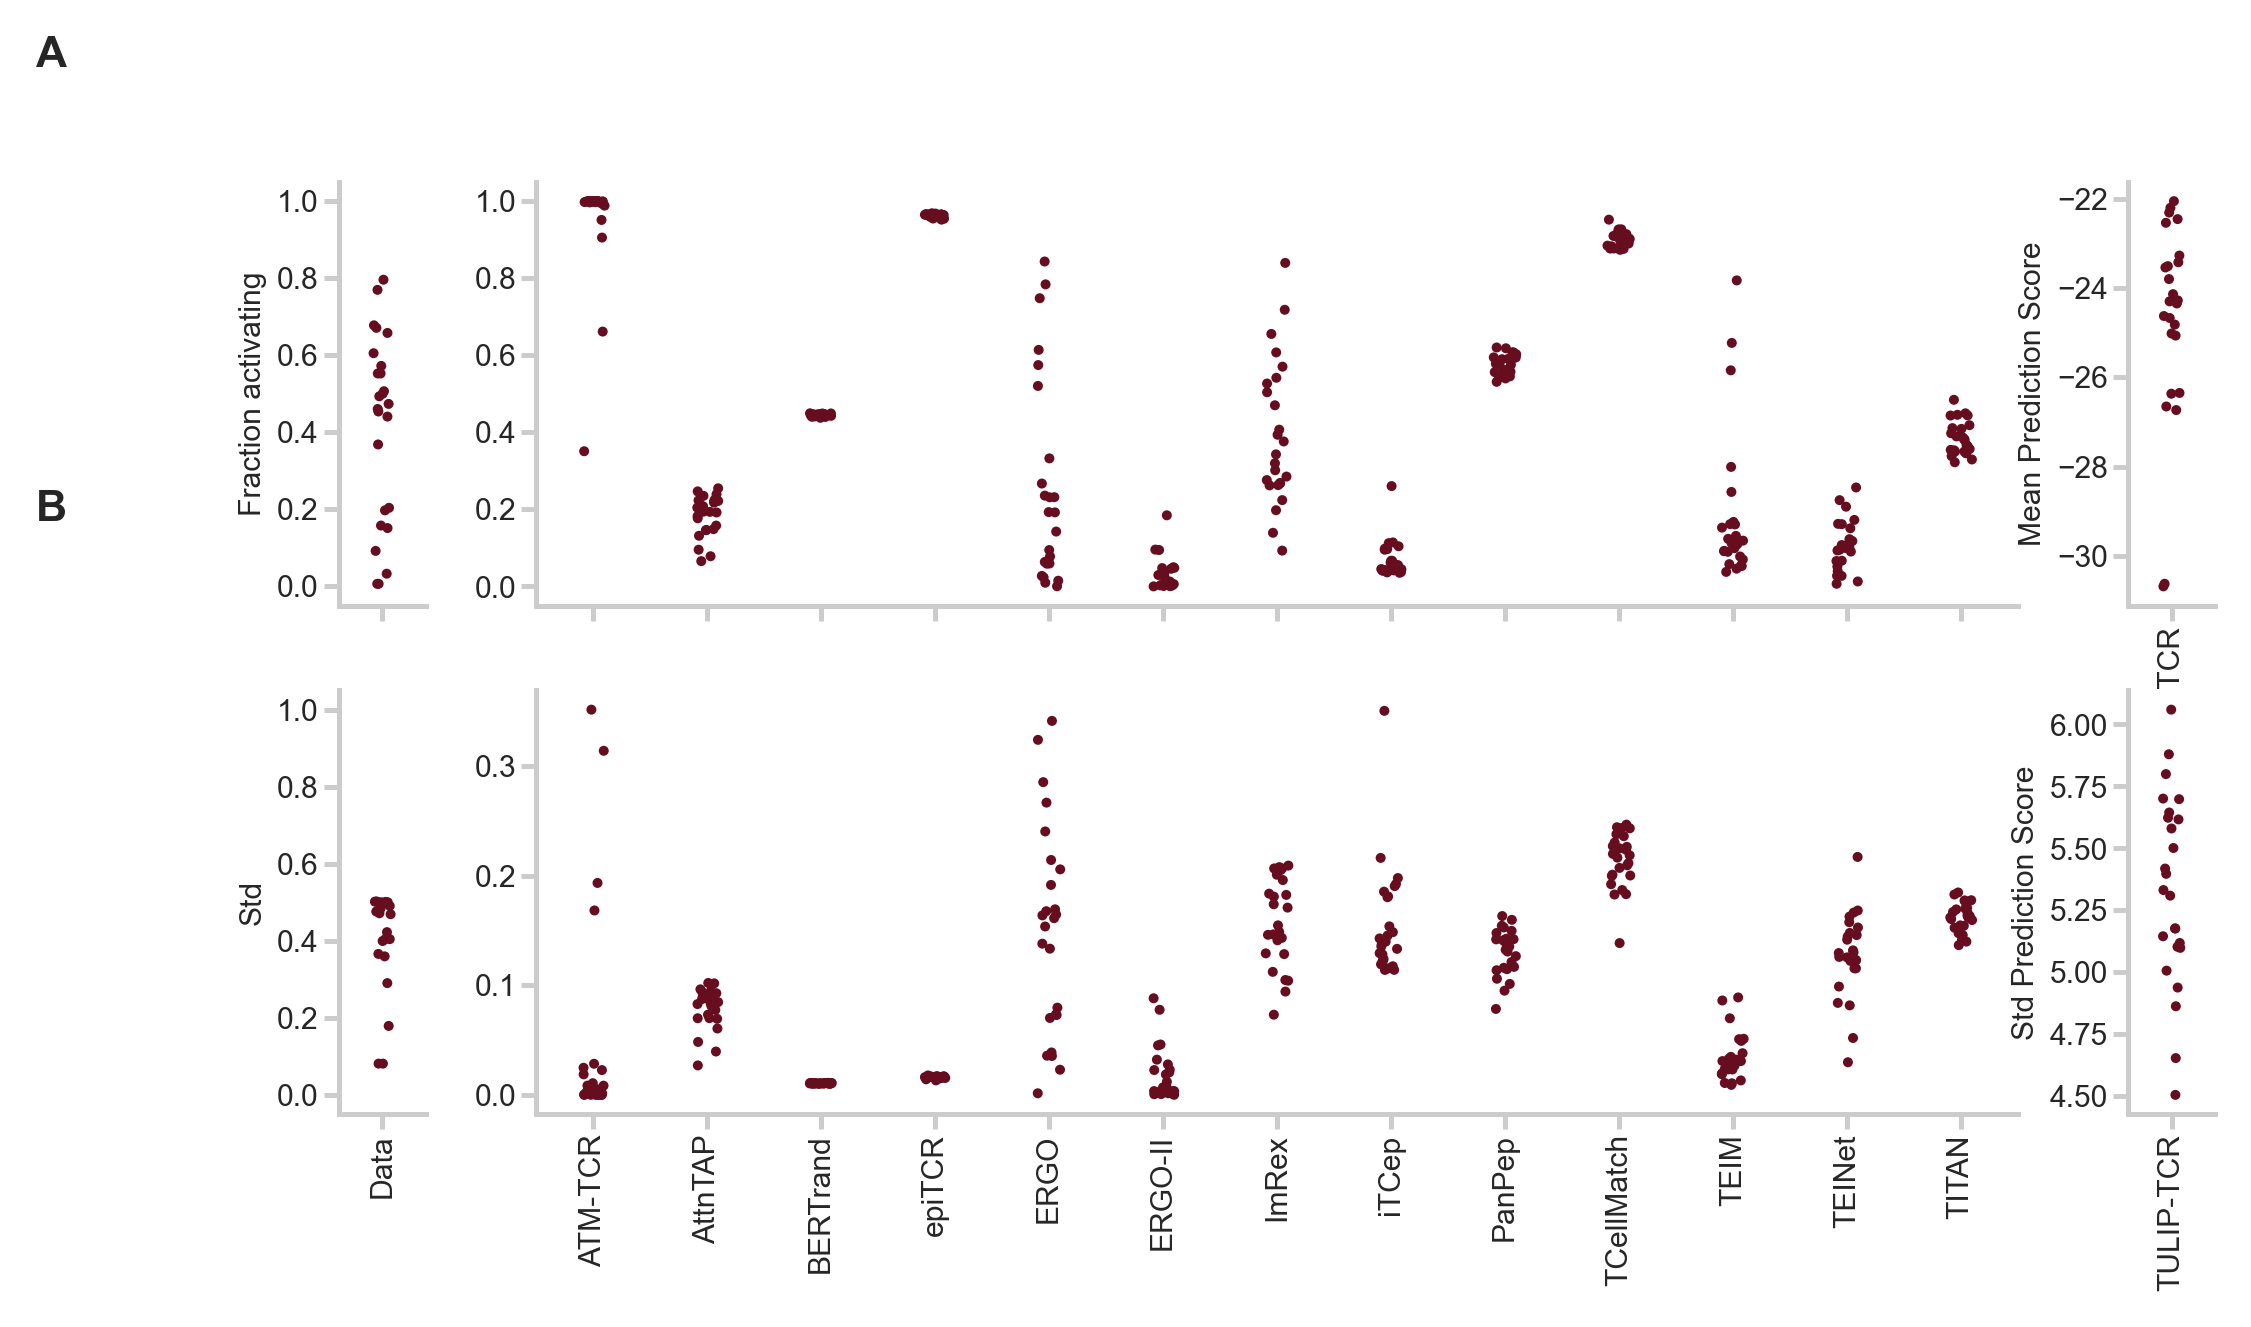

In [78]:
scale = 1
fig = plt.figure(figsize=(TEXT_WIDTH * scale, TEXT_WIDTH * scale * 0.5),
                 dpi=DPI)
set_font_size(6)
utils_plot.LINEWIDTH = 1

gridspecs = {}

gridspecs["full"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=3,
    height_ratios=[1, 1,],
    width_ratios=[1, 17, 1],
)

ax_a1 = fig.add_subplot(gridspecs["full"][0])
ax_a2 = fig.add_subplot(gridspecs["full"][1])
ax_a3 = fig.add_subplot(gridspecs["full"][2])
ax_b1 = fig.add_subplot(gridspecs["full"][3])
ax_b2 = fig.add_subplot(gridspecs["full"][4])
ax_b3 = fig.add_subplot(gridspecs["full"][5])

plot_stats_data('Mean', ax=ax_a1)
plot_stats_prediction('Mean', ['tulip-tcr'], ax_a2)
plot_stats_prediction('Mean', [el for el in best_models if el != 'tulip-tcr'], ax_a3)

plot_stats_data('Std', ax=ax_b1)
plot_stats_prediction('Std', ['tulip-tcr'], ax_b2)
plot_stats_prediction('Std', [el for el in best_models if el != 'tulip-tcr'], ax_b3)
    
ax_a1.set_xticklabels([])
ax_a2.set_xticklabels([])

ax_a2.set_ylabel(None)
ax_b2.set_ylabel(None)
    
    
fig.text(0.0, 0.975, 'A', size='x-large', weight='bold')
fig.text(0.0, 0.6, 'B', size='x-large', weight='bold')


#fig.tight_layout()
#fig.savefig('../figures/sfig_mutation_siinfekl_predictionScores.pdf',
#           dpi=DPI, bbox_inches='tight')
#fig.savefig('../figures/sfig_mutation_siinfekl_predictionScores.png',
#           dpi=DPI, bbox_inches='tight')

## Statistics

In [79]:
prediction_scores.groupby('TCR')['Epitope'].nunique()

TCR
B11        152
B13        152
B15        152
B3         152
E8         152
Ed10       152
Ed16-1     152
Ed16-30    152
Ed21       152
Ed23       152
Ed28       152
Ed31       152
Ed33       152
Ed39       152
Ed40       152
Ed45       152
Ed46       152
Ed5        152
Ed8        152
Ed9        152
F4         152
F5         152
G6         152
H5         152
OTI        152
Name: Epitope, dtype: int64

# Tables

In [80]:
from utils_latex import to_print_df, to_latex_string

In [81]:
metrics = ['AUC', 'APS', 'F1-Score', 'Pearson', 'Spearman']
df_print = to_print_df(df_performance_best, metrics, n_top=3, grouping='TCR')
df_print

Full Data                                               \
                      AUC            APS       F1-Score        Pearson   
ATM-TCR     \textbf{0.58}  \textbf{0.49}           0.59          -0.05   
AttnTAP              0.45           0.40           0.59          -0.01   
BERTrand    \textbf{0.56}  \textbf{0.47}  \textbf{0.59}  \textbf{0.13}   
epiTCR               0.52           0.42           0.59           0.00   
ERGO                 0.45           0.39  \textbf{0.59}          -0.13   
ERGO-II              0.52           0.44           0.59  \textbf{0.15}   
ImRex                0.43           0.36           0.59          -0.16   
iTCep                0.45           0.37  \textbf{0.60}          -0.15   
PanPep               0.48           0.40           0.59          -0.05   
TCellMatch           0.44           0.40           0.59          -0.19   
TEIM                 0.38           0.35           0.59          -0.18   
TEINet               0.50           0.42           0.59           0.01   
TITAN                0.49           0.41           0.59          -0.03   
TULIP-TCR   \textbf{0.57}  \textbf{0.50}           0.59  \textbf{0.13}   

                                      Per TCR                      \
                 Spearman                 AUC                 APS   
ATM-TCR     \textbf{0.17}  \textbf{0.58±0.16}  \textbf{0.47±0.27}   
AttnTAP             -0.08           0.42±0.10           0.41±0.24   
BERTrand    \textbf{0.13}           0.51±0.08           0.44±0.24   
epiTCR              -0.01           0.53±0.08           0.45±0.24   
ERGO                -0.10           0.50±0.16           0.46±0.24   
ERGO-II              0.10  \textbf{0.58±0.09}  \textbf{0.49±0.25}   
ImRex               -0.15           0.46±0.10           0.42±0.23   
iTCep               -0.11           0.45±0.13           0.39±0.21   
PanPep              -0.06           0.49±0.09           0.42±0.25   
TCellMatch          -0.10           0.42±0.07           0.40±0.24   
TEIM                -0.21           0.43±0.12           0.40±0.25   
TEINet              -0.02           0.46±0.09           0.42±0.23   
TITAN               -0.03           0.50±0.12           0.41±0.24   
TULIP-TCR   \textbf{0.16}  \textbf{0.56±0.11}  \textbf{0.50±0.26}   

                                                                        
                      F1-Score             Pearson            Spearman  
ATM-TCR              0.54±0.27           0.06±0.12  \textbf{0.10±0.17}  
AttnTAP              0.54±0.27          -0.05±0.15          -0.15±0.15  
BERTrand             0.54±0.27           0.04±0.07           0.05±0.07  
epiTCR               0.54±0.27           0.04±0.12           0.06±0.09  
ERGO        \textbf{0.54±0.27}  \textbf{0.06±0.21}           0.08±0.21  
ERGO-II     \textbf{0.54±0.27}  \textbf{0.15±0.09}  \textbf{0.12±0.09}  
ImRex                0.54±0.27          -0.07±0.21          -0.09±0.20  
iTCep                0.54±0.27          -0.15±0.08          -0.13±0.11  
PanPep               0.54±0.27          -0.04±0.09          -0.05±0.11  
TCellMatch           0.54±0.27          -0.24±0.13          -0.16±0.11  
TEIM                 0.54±0.27          -0.12±0.16          -0.11±0.14  
TEINet               0.54±0.27          -0.01±0.10          -0.07±0.11  
TITAN                0.54±0.27          -0.05±0.11          -0.04±0.10  
TULIP-TCR   \textbf{0.54±0.27}  \textbf{0.12±0.16}  \textbf{0.15±0.16}

In [82]:
to_latex_string(df_print)

\begin{table}[ht]
\resizebox{\textwidth}{!}{%}
\centering
\begin{tabular}{l l l l l l | l l l l l}
\toprule
 & Full Data &   &   &   &   & Per TCR &   &   &   &   \\
  & AUC & APS & F1-Score & Pearson & Spearman & AUC & APS & F1-Score & Pearson & Spearman \\
\midrule
ATM-TCR & \textbf{0.58} & \textbf{0.49} & 0.59 & -0.05 & \textbf{0.17} & \textbf{0.58±0.16} & \textbf{0.47±0.27} & 0.54±0.27 & 0.06±0.12 & \textbf{0.10±0.17} \\
AttnTAP & 0.45 & 0.40 & 0.59 & -0.01 & -0.08 & 0.42±0.10 & 0.41±0.24 & 0.54±0.27 & -0.05±0.15 & -0.15±0.15 \\
BERTrand & \textbf{0.56} & \textbf{0.47} & \textbf{0.59} & \textbf{0.13} & \textbf{0.13} & 0.51±0.08 & 0.44±0.24 & 0.54±0.27 & 0.04±0.07 & 0.05±0.07 \\
epiTCR & 0.52 & 0.42 & 0.59 & 0.00 & -0.01 & 0.53±0.08 & 0.45±0.24 & 0.54±0.27 & 0.04±0.12 & 0.06±0.09 \\
ERGO & 0.45 & 0.39 & \textbf{0.59} & -0.13 & -0.10 & 0.50±0.16 & 0.46±0.24 & \textbf{0.54±0.27} & \textbf{0.06±0.21} & 0.08±0.21 \\
ERGO-II & 0.52 & 0.44 & 0.59 & \textbf{0.15} & 0.10 & \textbf{0.58±0.09

## Numbers

In [83]:
df_performance_alt[(df_performance_alt['Metric'].isin(['AUC', 'Spearman']))
                  & (~df_performance_alt['Group'].isin(['full_data', 'Average', 'WeightedAverage']))
                  & (df_performance_alt['BaseModel']=='tcellmatch')].groupby(['Variant', 'Metric'])['Value'].mean()

Variant     Metric  
GRU 0       AUC         0.652644
            Spearman    0.323064
GRU 1       AUC         0.398454
            Spearman   -0.199023
GRU 2       AUC         0.458431
            Spearman   -0.090029
GRU-sep 0   AUC         0.514417
            Spearman    0.059452
GRU-sep 1   AUC         0.503614
            Spearman   -0.021898
GRU-sep 2   AUC         0.535545
            Spearman    0.067030
LSTM 0      AUC         0.480017
            Spearman    0.001342
LSTM 1      AUC         0.425308
            Spearman   -0.160147
LSTM 2      AUC         0.416624
            Spearman   -0.106372
LSTM-sep 0  AUC         0.591169
            Spearman    0.231363
LSTM-sep 1  AUC         0.633380
            Spearman    0.244478
LSTM-sep 2  AUC         0.446135
            Spearman   -0.083601
Linear 0    AUC         0.588948
            Spearman    0.173358
Linear 1    AUC         0.422184
            Spearman   -0.163105
Linear 2    AUC         0.611840
            Spearman  

In [84]:
df_performance_alt[(df_performance_alt['Metric'].isin(['AUC', 'Spearman']))
                  & (~df_performance_alt['Group'].isin(['full_data', 'Average', 'WeightedAverage']))
                  & (df_performance_alt['BaseModel']=='tcellmatch')].groupby(['Variant', 'Metric'])['Value'].std()

Variant     Metric  
GRU 0       AUC         0.160811
            Spearman    0.164804
GRU 1       AUC         0.128322
            Spearman    0.104941
GRU 2       AUC         0.134657
            Spearman    0.126361
GRU-sep 0   AUC         0.131253
            Spearman    0.102218
GRU-sep 1   AUC         0.091392
            Spearman    0.140714
GRU-sep 2   AUC         0.113201
            Spearman    0.148592
LSTM 0      AUC         0.115349
            Spearman    0.142249
LSTM 1      AUC         0.137625
            Spearman    0.100225
LSTM 2      AUC         0.119225
            Spearman    0.202233
LSTM-sep 0  AUC         0.136082
            Spearman    0.076927
LSTM-sep 1  AUC         0.118070
            Spearman    0.114786
LSTM-sep 2  AUC         0.153512
            Spearman    0.142806
Linear 0    AUC         0.120223
            Spearman    0.093823
Linear 1    AUC         0.074927
            Spearman    0.109870
Linear 2    AUC         0.112816
            Spearman  

In [85]:
prediction_scores[['MHC'] + prediction_scores.columns[-14:].tolist()].groupby('MHC').mean()

,atm-tcr,attntap_VDJDB,bertrand,epitcr_WO_MHC,ergo-i_AE_VDJDB,ergo-ii_VDJDB,imrex_FULL,itcep,panpep,tcellmatch_LINEAR_CV1,teim,teinet_SMALL_DS,titan,tulip-tcr
MHC,,,,,,,,,,,,,,
H2-Kb,0.953408,0.184721,0.444817,0.962761,0.256313,0.028871,0.393976,0.071504,0.580339,0.902366,0.181978,0.107474,0.384741,-24.709797


In [86]:
prediction_scores.groupby('MHC')['Label'].mean()

MHC
H2-Kb    0.416053
Name: Label, dtype: float64

In [87]:
iedb = pd.read_csv('../data/processed/iedb.csv', index_col=0)
vdjdb = pd.read_csv('../data/processed/vdjdb.csv', index_col=0)
mcpas = pd.read_csv('../data/processed/mcpas_tcr.csv', index_col=0)
df_all_dbs = pd.concat([iedb, vdjdb, mcpas])[['CDR3_beta', 'Epitope']].drop_duplicates()
df_all_dbs = df_all_dbs[df_all_dbs['CDR3_beta'].notna()]
df_all_dbs = df_all_dbs[df_all_dbs['Epitope'].isin(['SIINFEKL'])]
df_all_dbs = pd.DataFrame(df_all_dbs.groupby('Epitope')['CDR3_beta'].nunique())
df_all_dbs

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_22764\1068830141.py:1: DtypeWarning: Columns (1,2,3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  iedb = pd.read_csv('../data/processed/iedb.csv', index_col=0)


,CDR3_beta
Epitope,
SIINFEKL,326


In [88]:
df_performance_best[
    (df_performance_best['BaseModel'].isin(['atm-tcr', 'ergo-ii', 'tulip-tcr', 'bertrand', 'ergo']))
    & (df_performance_best['Metric']=='AUC')
    & (~df_performance_best['Group'].isin(['full_data', 'Average', 'WeightedAverage']))
].groupby('Dataset')['Value'].mean()

Dataset
SIINFEKL    0.559673
Name: Value, dtype: float64

In [89]:
df_performance_best[
    (df_performance_best['BaseModel'].isin(['tulip-tcr', 'ergo-ii', 'atm-tcr', 'ergo', 'bertrand']))
    & (df_performance_best['Metric']=='Spearman')
    & (~df_performance_best['Group'].isin(['full_data', 'Average', 'WeightedAverage']))
].groupby('Dataset')['Value'].mean()

Dataset
SIINFEKL    0.10439
Name: Value, dtype: float64

In [90]:
df_performance_best[
    (df_performance_best['Metric']=='Spearman')
    & (df_performance_best['Group'] == 'full_data')
]['Value'].sort_values()

157   -0.214730
157   -0.148061
157   -0.114015
157   -0.102668
157   -0.102663
157   -0.077935
157   -0.055164
157   -0.030494
157   -0.022144
157   -0.007259
157    0.100637
157    0.132493
157    0.158098
157    0.171039
Name: Value, dtype: float64

In [91]:
df_performance_best[
    (df_performance_best['Metric']=='AUC')
    & (df_performance_best['Group'] == 'full_data')
]['Value'].sort_values()

0    0.382640
0    0.429805
0    0.440113
0    0.446036
0    0.449070
0    0.451376
0    0.476797
0    0.488983
0    0.498818
0    0.519759
0    0.521838
0    0.562786
0    0.570654
0    0.578365
Name: Value, dtype: float64